In [2]:
import numpy as np
import rebound
import reboundx
from reboundx import constants
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
# Constants
m_e = 3e-6 # in solar masses
r_sol = 0.00465 # in AU

# Set up simulation
sim = rebound.Simulation()
sim.add(m = 0.871, hash = 'star')
sim.add(m = 2.6 * m_e, a = 0.01222, e = 0, inc = np.radians(90 - 72.80), hash = 'USP') # USP
sim.add(m = 8.5 * m_e, a = 0.05210, e = 0.183, inc = np.radians(90 - 88.99), hash = 'b')
sim.add(m = 8.6 * m_e, a = 0.0818, e = 0.065, inc = np.radians(90 - 88.52), hash = 'c')
sim.add(m = 9.5 * m_e, a = 0.1376, e = 0.075, inc = np.radians(90 - 88.753), hash = 'd')
sim.integrator = "whfast"
sim.dt = 0.0005 * 2 * np.pi
sim.move_to_com()

# Add REBOUNDx effects
ps = sim.particles
rebx = reboundx.Extras(sim)

# stellar J2 moment
gh = rebx.load_force('gravitational_harmonics')
rebx.add_force(gh)
ps['star'].params['J2'] = 3.3e-6
ps['star'].params['R_eq'] = 0.852 * r_sol

# GR correction
gr = rebx.load_force('gr')
rebx.add_force(gr)
gr.params["c"] = constants.C

In [4]:
# Integrate simulation

# Define integration time
tmax = 1e5 * 2 * np.pi
tstep = 100 * 2 * np.pi
times = np.arange(0, tmax, tstep)
Nout = len(times)

p_usp = np.zeros((Nout, 5))
p_b = np.zeros((Nout, 5))
p_c = np.zeros((Nout, 5))
p_d = np.zeros((Nout, 5))

for i, t in tqdm(enumerate(times)):
    sim.integrate(t)
    
    p_usp[i] = ps[1].a, ps[1].e, ps[1].pomega, ps[1].inc, ps[1].pomega
    p_b[i] = ps[2].a, ps[2].e, ps[2].pomega, ps[2].inc, ps[2].pomega
    p_c[i] = ps[3].a, ps[3].e, ps[3].pomega, ps[3].inc, ps[3].pomega
    p_d[i] = ps[4].a, ps[4].e, ps[4].pomega, ps[4].inc, ps[4].pomega

1000it [06:33,  2.54it/s]


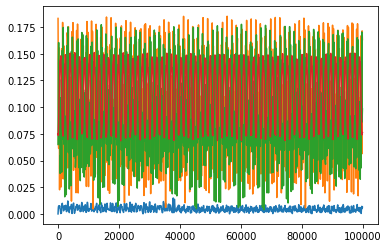

In [7]:
plt.plot(times / (2 * np.pi), p_usp[:,1])
plt.plot(times / (2 * np.pi), p_b[:,1])
plt.plot(times / (2 * np.pi), p_c[:,1])
plt.plot(times / (2 * np.pi), p_d[:,1])

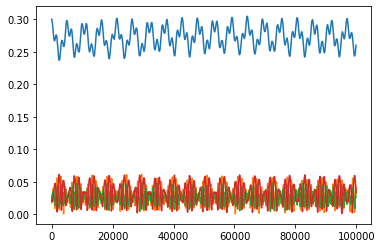

In [8]:
plt.plot(times / (2 * np.pi), p_usp[:,3])
plt.plot(times / (2 * np.pi), p_b[:,3])
plt.plot(times / (2 * np.pi), p_c[:,3])
plt.plot(times / (2 * np.pi), p_d[:,3])